# Gensim Tutorials

## 1. Introduction

- Core Concepts:
  - Document
  - Corpus
  - Vectors
  - Models
  
## 2. Vector Similarity

## 3. Data Streaming

- Loading large corpus efficently.
  
## 4. Utiities

- Saving and Loading Corporq.
- Saing and Loading Models.

## 5. Models

- TF-IDF
- LSI
- LDA
- Doc2Vec

## 6. Project

- Text Classification using DoC2Vec and Sklearn.

In [1]:
%load_ext watermark
%watermark -v -p numpy,pandas,polars,mlxtend,omegaconf,gensim --conda

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

numpy    : 1.26.4
pandas   : 2.2.1
polars   : 0.20.18
mlxtend  : 0.23.1
omegaconf: 2.3.0
gensim   : 4.3.3

conda environment: torch_p11



In [2]:
# Built-in library
from pathlib import Path
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(n=200)

warnings.filterwarnings("ignore")


# auto reload imports# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt

# NumPy settings
np.set_printoptions(precision=4)

# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)
pl.Config.set_tbl_rows(500)

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

<br>

# [Gensim](https://radimrehurek.com/gensim/index.html)

- `Gensim` = **“Generate Similar”**
- Gensim is a free open-source Python library for representing documents as semantic vectors, as efficiently (computer-wise) and painlessly (human-wise) as possible.
- It's designed to process raw, unstructured digital texts (“plain text”) using unsupervised machine learning algorithms.

#### Installation

```sh
pip install --upgrade gensim
```

### Use cases

- Train large-scale NLP semantic models.
- Represent text as semantic vectors.
- Find semantically related documents.


### Core Concepts of Gensim

- `Document`: some text.
- `Corpus`: a collection of documents.
- `Vector`: a mathematically convenient representation of a document.
- `Model`: an algorithm for transforming vectors from one representation to another.

In [3]:
import gensim

### 1. Document

In [4]:
# Demonstartion purpose only! Gensim handles large corpora by streaming documents,
# avoiding memory overload.
text_corpus: list[str] = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# Create a set of frequent words
stopwords: set[str] = set("for a of the and to in".split())
print(f"{stopwords = }")

# Lowercase each document, split it by white space and filter out stopwords
texts: list[list[str]] = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in text_corpus
]
console.print(f"{texts = }")

stopwords = {'of', 'for', 'and', 'to', 'in', 'a', 'the'}


texts = [['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'], ['survey', 'user', 'opinion',
'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'management', 'system'], ['system', 
'human', 'system', 'engineering', 'testing', 'eps'], ['relation', 'user', 'perceived', 'response', 'time', 'error',
'measurement'], ['generation', 'random', 'binary', 'unordered', 'trees'], ['intersection', 'graph', 'paths', 
'trees'], ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'], ['graph', 'minors', 'survey']]

In [5]:
from collections import defaultdict


# Count the word frequencies
frequency: defaultdict[str, int] = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1


console.print(f"{frequency = }")

# Keep ONLY tokens that occur more than once
processed_corpus: list[list[str]] = [
    [token for token in text if frequency[token] > 1] for text in texts
]
console.print(f"{processed_corpus = }")

frequency = defaultdict(<class 'int'>, {'human': 2, 'machine': 1, 'interface': 2, 'lab': 1, 'abc': 1, 'computer': 
2, 'applications': 1, 'survey': 2, 'user': 3, 'opinion': 1, 'system': 4, 'response': 2, 'time': 2, 'eps': 2, 
'management': 1, 'engineering': 1, 'testing': 1, 'relation': 1, 'perceived': 1, 'error': 1, 'measurement': 1, 
'generation': 1, 'random': 1, 'binary': 1, 'unordered': 1, 'trees': 3, 'intersection': 1, 'graph': 3, 'paths': 1, 
'minors': 2, 'iv': 1, 'widths': 1, 'well': 1, 'quasi': 1, 'ordering': 1})

processed_corpus = [['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 
'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 
'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]

<br>

### 2. Corpus

In [6]:
from gensim import corpora


# Create a dictionary that contains the token_id and the token_text
dictionary = corpora.Dictionary(processed_corpus)
console.print(f"{dictionary.items() = }")

dictionary.items() = ItemsView(<gensim.corpora.dictionary.Dictionary object at 0x14824b750>)

### 3. Vector

- A mathematical way of representing documents in a multi-dimensional space.

In [7]:
# Vector: a mathematical way of representing documents in a multi-dimensional space.

# View the token ids
console.print(f"{dictionary.token2id = }")

# Vectorize a document
new_doc: str = "Human computer interaction"
new_vec: list[tuple[int, int]] = dictionary.doc2bow(new_doc.lower().split())
console.print(f"{new_vec = }")

dictionary.token2id = {'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 
6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}

new_vec = [(0, 1), (1, 1)]

In [8]:
new_doc_list: list[str] = new_doc.lower().split()

for idx, token in enumerate(new_doc_list):
    flag: bool = token in dictionary.values()
    count_: int = new_doc.count(token)
    print(f"{token}: ({idx}, {count_}) is in dictionary: {flag}")

human: (0, 0) is in dictionary: True
computer: (1, 1) is in dictionary: True
interaction: (2, 1) is in dictionary: False


In [9]:
# Vectorize the entire using a BoW (Bag of Words) approach. i.e. count the
# number of times a word appears in a document.
bow_corpus: list[list[tuple[int, int]]] = [
    dictionary.doc2bow(doc) for doc in processed_corpus
]
console.print(f"{bow_corpus = }")

bow_corpus = [[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), 
(8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 
1)], [(4, 1), (10, 1), (11, 1)]]

<br>

### 4. Model

- It refers to `transformation` from one document representation to another.
- E.g. `TF-IDF` model transforms word frequency counts based on word rarity in the corpus. 

In [10]:
from gensim import models


# Train the model
tfidf: models.TfidfModel = models.TfidfModel(corpus=bow_corpus)

# Transform an input document
doc: list[str] = "System Minors".lower().split()
doc_bow: list[tuple[int, int]] = dictionary.doc2bow(doc)
doc_vec: list[tuple[int, float]] = tfidf[doc_bow]
console.print(f"{doc_vec = }")

#  system: 0.5898341626740045, minors: 0.8075244024440723
# [(5, 0.5898341626740045), (11, 0.8075244024440723)]
# Because system occurs a lot more than minors in the corpus, it has a lower tf-idf score.

doc_vec = [(5, 0.5898341626740045), (11, 0.8075244024440723)]

#### Calculating Similariites

In [11]:
from gensim import similarities


# Prepare for similarity search
num_features: int = 12  # number of features (dimensions)
corpus_vector: list[tuple[int, float]] = tfidf[bow_corpus]

index = similarities.SparseMatrixSimilarity(
    corpus=corpus_vector, num_features=num_features
)

query_doc: list[str] = "System engineering".lower().split()
query_doc_bow: list[tuple[int, int]] = dictionary.doc2bow(query_doc)
query_doc_vector: list[tuple[int, float]] = tfidf[query_doc_bow]
sims: list[tuple[int, float]] = index[query_doc_vector]
console.print(f"{sims = }")

sims = array([0.    , 0.3245, 0.4171, 0.7185, 0.    , 0.    , 0.    , 0.    ,
       0.    ], dtype=float32)

In [12]:
# Compare `text_corpus` with `sims`
pprint(text_corpus)

['Human machine interface for lab abc computer applications',
 'A survey of user opinion of computer system response time',
 'The EPS user interface management system',
 'System and human system engineering testing of EPS',
 'Relation of user perceived response time to error measurement',
 'The generation of random binary unordered trees',
 'The intersection graph of paths in trees',
 'Graph minors IV Widths of trees and well quasi ordering',
 'Graph minors A survey']


In [13]:
# Sort
for idx, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(f"doc {idx}: similarity={score:4f}")

doc 3: similarity=0.718481
doc 2: similarity=0.417076
doc 1: similarity=0.324487
doc 0: similarity=0.000000
doc 4: similarity=0.000000
doc 5: similarity=0.000000
doc 6: similarity=0.000000
doc 7: similarity=0.000000
doc 8: similarity=0.000000


<hr><br>

#### Loading Data Effciently

- Streaming data from disk.

In [14]:
from smart_open import open  # for transparently opening remote files


# Copied from https://radimrehurek.com/gensim/tut1.html
class MyCorpus:
    def __iter__(self):
        for line in open("https://radimrehurek.com/mycorpus.txt"):
            # assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(line.lower().split())

In [15]:
class MyCustomCorpus:
    def __init__(self, text: str = "text") -> None:
        self.text = text
        self.data: pl.LazyFrame = pl.scan_csv("../../data/test.csv").select([self.text])

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

    def __iter__(self):
        for row in self.data.collect().iter_rows(named=True):
            text: str = row[self.text]
            yield dictionary.doc2bow(text.lower().split())

In [16]:
corpus_memory_friendly: MyCustomCorpus = MyCustomCorpus(text="text")

print(corpus_memory_friendly)

MyCustomCorpus()


In [17]:
from gensim.corpora import Dictionary


stopwords: set[str] = set("i is for a of the and to in on my".split())
df: pl.DataFrame = pl.read_csv("../../data/test.csv")
processed_corpus: list[list[str]] = [
    line.lower().split() for line in df["text"].to_list()
]

dictionary: Dictionary = Dictionary(processed_corpus)

In [18]:
for idx, vec in enumerate(corpus_memory_friendly):
    if idx < 3:
        print(vec)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1)]
[(5, 1), (6, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(6, 4), (8, 1), (20, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]


In [19]:
# Text preprocessing
fp: str = "../../data/test.csv"
df: pl.DataFrame = pl.read_csv(fp)
processed_corpus: list[list[str]] = [
    line.lower().split() for line in df["text"].to_list()
]

dictionary: Dictionary = Dictionary(processed_corpus)

# Extract the ids of the stopwords
stop_ids: list[int] = [
    dictionary.token2id[s_word] for s_word in stopwords if s_word in dictionary.token2id
]

# Extract ids of words with frequency less than 2
low_frequency_ids: list[int] = [
    tokenid for tokenid, docfreq in dictionary.dfs.items() if docfreq < 2
]
# Remove the ids
dictionary.filter_tokens(stop_ids + low_frequency_ids)

# Remove gaps in id sequence after words are filtered
dictionary.compactify()
print(dictionary)

Dictionary<10 unique tokens: ['messi', 'soccer', 'jesus', 'team', 'has']...>


In [20]:
print(dictionary.__len__())

10


<hr>

### Corpus Formats

- Gensim serially processes `Vector Space` corpus files, reading/writing one document at a time without loading the entire corpus into memory.

#### Save Corpus

- One of the more notable file formats is the `Market Matrix` format. To save a corpus in the Matrix Market format:

```py
# Create a toy corpus of 2 documents, as a plain Python list
# make one document empty, for the heck of it
corpus: list[list[tuple[int, float]]] = [[(1, 0.5)], []]  

# Save the corpus in Matrix Market format
corpora.MmCorpus.serialize('/tmp/corpus.mm', corpus)
```

- Other formats include:
  - `Joachim’s SVMlight` format
  - `Blei’s LDA-C` format
  - `GibbsLDA++` format.

```py
corpora.SvmLightCorpus.serialize('/tmp/corpus.svmlight', corpus)
corpora.BleiCorpus.serialize('/tmp/corpus.lda-c', corpus)
corpora.LowCorpus.serialize('/tmp/corpus.low', corpus)
```

#### Load The Corpus

- Conversely, to load a corpus iterator from a Matrix Market file:

```py
corpus = corpora.MmCorpus('/tmp/corpus.mm')
```

### Compatibility With NumPy And SciPy

- Gensim also contains efficient utility functions to help converting from/to numpy matrices.

```py
import gensim
import numpy as np
import gensim

# random matrix as an example
numpy_matrix: np.ndarray = np.random.randint(10, size=[5, 2])  
corpus = gensim.matutils.Dense2Corpus(numpy_matrix)

# convert from gensim corpus to numpy matrix
numpy_matrix = gensim.matutils.corpus2dense(corpus, num_terms=number_of_corpus_features)
```
<br>

#### From/to scipy.sparse matrices


```py
import scipy.sparse

# random sparse matrix as an example
scipy_sparse_matrix = scipy.sparse.random(5, 2)  # random sparse matrix as example
corpus = gensim.matutils.Sparse2Corpus(scipy_sparse_matrix)
scipy_csc_matrix = gensim.matutils.corpus2csc(corpus)
```


### Loading And Saving Models

In [21]:
from gensim.interfaces import TransformedCorpus


doc_bow: list[list[tuple[int, int]]] = [
    dictionary.doc2bow(text) for text in processed_corpus
]
tfidf_model: models.TfidfModel = models.TfidfModel(dictionary=dictionary)
corpus_tfidf: TransformedCorpus = tfidf_model[doc_bow]

lsi_model: models.LsiModel = models.LsiModel(
    corpus=corpus_tfidf, id2word=dictionary, num_topics=2
)
corpus_lsi: TransformedCorpus = lsi_model[corpus_tfidf]

# lsi_model.show_topics()
console.print(lsi_model.print_topics(num_topics=2))

[
    (
        0,
        '0.600*"messi" + 0.557*"soccer" + 0.339*"jesus" + 0.290*"team" + 0.274*"has" + 0.234*"religion" + 
0.000*"are" + 0.000*"religious" + 0.000*"prayer" + 0.000*"together."'
    ),
    (
        1,
        '-0.500*"prayer" + -0.500*"together." + -0.500*"religious" + -0.500*"are" + -0.000*"messi" + 
0.000*"religion" + 0.000*"team" + 0.000*"has" + 0.000*"jesus" + -0.000*"soccer"'
    )
]

#### Comment

```text
(0, '0.600*"messi" + 0.557*"soccer" + 0.339*"jesus" + 0.290*"team" + 0.274*"has" + 0.234*"religion" + 0.000*"religious" + 0.000*"are" + 0.000*"prayer" + 0.000*"together."')

- This means that for topic 0, `messi`, `soccer`, `jesus`, `team`, `has`, `religion` are all related words and contribute the most to the topic.
```

In [22]:
for doc, as_text in zip(corpus_lsi, processed_corpus):
    print(f"{doc} | {as_text}")

[(0, 0.7975568794650292)] | ['messi', 'is', 'the', 'best', 'soccer', 'player', 'in', 'the', 'world.']
[(0, 0.5700679546502849)] | ['the', 'soccer', 'field', 'became', 'a', 'sacred', 'ground', 'for', 'the', 'local', 'community', 'and', 'a', 'way', 'to', 'glorify', 'jesus', 'christ.']
[(0, 0.289801536297295)] | ['a', 'divine', 'goal', 'changed', 'the', 'fate', 'of', 'the', 'underdog', 'team', 'thanks', 'to', 'the', 'great', 'passion', 'of', 'the', 'players.']
[(0, 0.7975568794650292)] | ['soccer', 'players', 'prayed', 'together', 'before', 'a', 'crucial', 'match.', 'e.g.', 'messi']
[(0, 0.5782949666969791)] | ['soccer', 'has', 'a', 'global', 'community.', 'the', 'team', 'was', 'awarded', 'a', 'medal.']
[(0, 0.3596260221908562)] | ['religion', 'has', 'been', 'a', 'guiding', 'force', 'in', 'my', 'life,', 'helping', 'me', 'make', 'important', 'decisions.', 'thank', 'you', 'lord']
[(1, -0.8660254037844388)] | ['prayer', 'and', 'meditation', 'are', 'essential', 'parts', 'of', 'my', 'religious

<br>

#### Comment

```text
Topic 0: Probably about soccer.
(0, 0.7975568794650282)] | ['messi', 'is', 'the', 'best', 'soccer', 'player', 'in', 'the', 'world.']
[(0, 0.5700679546502856)] | ['the', 'soccer', 'field', 'became', 'a', 'sacred', 'ground', 'for', 'the', 'local', 'community', 'and', 'a', 'way', 'to', 'glorify', 'jesus', 'christ.']

# Topic 1: Probably about prayer/religious practice.
[(1, 0.8660254037844384)] | ['prayer', 'and', 'meditation', 'are', 'essential', 'parts', 'of', 'my', 'religious', 'practice.']
[(1, 0.7071067811865475)] | ['prayer', 'is', 'the', 'key.', 'do', 'not', 'forget', 'to', 'pray', 'together.']
```

<br><br>


#### Save The Model



In [23]:
# Save LSI model
lsi_model.save("../../models/lsi_model.lsi")

In [24]:
# Load the model
loaded_lsi_model = models.LsiModel.load("../../models/lsi_model.lsi")
console.print(loaded_lsi_model.print_topics(num_topics=2))

[
    (
        0,
        '0.600*"messi" + 0.557*"soccer" + 0.339*"jesus" + 0.290*"team" + 0.274*"has" + 0.234*"religion" + 
0.000*"are" + 0.000*"religious" + 0.000*"prayer" + 0.000*"together."'
    ),
    (
        1,
        '-0.500*"prayer" + -0.500*"together." + -0.500*"religious" + -0.500*"are" + -0.000*"messi" + 
0.000*"religion" + 0.000*"team" + 0.000*"has" + 0.000*"jesus" + -0.000*"soccer"'
    )
]

<br>

### Similarity Queries

In [25]:
# Type annotations
from typing import TypeAlias, TypeVar


BoW: TypeAlias = list[list[tuple[int, int]]]
Corpus: TypeAlias = list[list[str]]
VectorCorpus: TypeAlias = list[list[tuple[int, float]]]

text_corpus: list[str] = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# Create a set of frequent words
stopwords: set[str] = set("for a of the and to in".split())

In [26]:
# Text preprocessing
processed_corpus: Corpus = [line.lower().split() for line in text_corpus]

dictionary: Dictionary = Dictionary(processed_corpus)

# Extract the ids of the stopwords
stop_ids: list[int] = [
    dictionary.token2id[s_word] for s_word in stopwords if s_word in dictionary.token2id
]

# Extract ids of words with frequency less than 2
low_frequency_ids: list[int] = [
    tokenid for tokenid, docfreq in dictionary.dfs.items() if docfreq < 2
]
# Remove the ids
dictionary.filter_tokens(stop_ids + low_frequency_ids)

# Remove gaps in id sequence after words are filtered
dictionary.compactify()
print(dictionary)

corpus_bow: BoW = [dictionary.doc2bow(text) for text in processed_corpus]

Dictionary<12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...>


In [27]:
from gensim.models import LsiModel, TfidfModel


# LSI is a transformation that finds patterns between words and topics by
# mapping documents into a lower-dimensional space.
lsi_model: LsiModel = LsiModel(corpus=corpus_bow, id2word=dictionary, num_topics=2)

In [28]:
# Rank nine documents by semantic similarity to the query "Human computer interaction",
# ignoring external factors and focusing solely on word relationships within the text.
doc: str = "Human computer interaction"
vec_bow: BoW = dictionary.doc2bow(doc.lower().split())

# Convert the query to LSI space.
vec_lsi: VectorCorpus = lsi_model[vec_bow]
print(f"{vec_lsi = }")

vec_lsi = [(0, 0.46182100453271624), (1, -0.0700276652790007)]


#### Initializing Query Structures

- To prepare for similarity queries, we need to enter all documents which we want to compare against subsequent queries.
- In our case, they are the same nine documents used for training LSI, converted to 2-D LSA space. But that’s only incidental, we might also be indexing a different corpus altogether.

**Warning ⚠️ !!**

- The class `similarities.MatrixSimilarity` is only appropriate when the whole set of vectors fits into memory.
- For example, a corpus of one million documents would require 2GB of RAM in a 256-dimensional LSI space, when used with this class.
- Without 2GB of free RAM, you would need to use the `similarities.Similarity` class (more effi cient) instead.
- This class operates in fixed memory, by splitting the index across multiple files on disk, called shards.

In [29]:
from gensim import similarities


# Transform to LSIspace and index for quering
index = similarities.MatrixSimilarity(lsi_model[corpus_bow])

# === Persit and load index ===
# index.save('index.index')
# index = similarities.MatrixSimilarity.load('index.index')

# === Calculate simularity ===
sims: list[int] = index[vec_lsi]
print(sims)

[ 0.9981  0.9375  0.9984  0.9866  0.9076 -0.1242 -0.1064 -0.0988  0.05  ]


In [30]:
# Format the result
sorted_sims: tuple[int, float] = sorted(
    enumerate(sims), key=lambda x: x[1], reverse=True
)
print(f"query: {doc}\n")
for idx, score in sorted_sims:
    print(f"idx: {idx} | similarity: {score}| {text_corpus[idx]}")

query: Human computer interaction

idx: 2 | similarity: 0.9984452724456787| The EPS user interface management system
idx: 0 | similarity: 0.9980930089950562| Human machine interface for lab abc computer applications
idx: 3 | similarity: 0.9865885972976685| System and human system engineering testing of EPS
idx: 1 | similarity: 0.9374863505363464| A survey of user opinion of computer system response time
idx: 4 | similarity: 0.9075594544410706| Relation of user perceived response time to error measurement
idx: 8 | similarity: 0.050041764974594116| Graph minors A survey
idx: 7 | similarity: -0.09879463911056519| Graph minors IV Widths of trees and well quasi ordering
idx: 6 | similarity: -0.10639259219169617| The intersection graph of paths in trees
idx: 5 | similarity: -0.12416791915893555| The generation of random binary unordered trees


#### Comment

- The `EPS user interface management system` is directly related to `Human Computer Interaction` (HCI).
- HCI is the study of how humans interact with computers.
- A user interface management system is a software component specifically designed to create and manage the interaction between a user and a computer.
- Even though there's no specific keyword match betweeen `EPS user interface management system` and `HCI`, the relationship between the two is still relevant because LSI uses semantic relatiohsips to find relevant documents.

In [31]:
# Using TF-IDF
tfidf_model: TfidfModel = TfidfModel(
    corpus=corpus_bow,
    dictionary=dictionary,
)
vec_bow: BoW = tfidf_model[vec_bow]

index_tfidf = similarities.SparseMatrixSimilarity(
    tfidf_model[corpus_bow], num_features=len(dictionary)
)

# Calculate similarity
sims_tfidf: list[float] = index_tfidf[vec_bow]

# Format the result
sorted_sims_tfidf: tuple[int, float] = sorted(
    enumerate(sims_tfidf), key=lambda x: x[1], reverse=True
)
print(f"query: {doc}\n")
for idx, score in sorted_sims_tfidf:
    print(f"idx: {idx} | similarity: {score}| {text_corpus[idx]}")

query: Human computer interaction

idx: 0 | similarity: 0.8164965510368347| Human machine interface for lab abc computer applications
idx: 3 | similarity: 0.3477731943130493| System and human system engineering testing of EPS
idx: 1 | similarity: 0.3141290247440338| A survey of user opinion of computer system response time
idx: 2 | similarity: 0.0| The EPS user interface management system
idx: 4 | similarity: 0.0| Relation of user perceived response time to error measurement
idx: 5 | similarity: 0.0| The generation of random binary unordered trees
idx: 6 | similarity: 0.0| The intersection graph of paths in trees
idx: 7 | similarity: 0.0| Graph minors IV Widths of trees and well quasi ordering
idx: 8 | similarity: 0.0| Graph minors A survey


### Doc2Vec / Paragraph Vector

- `Doc2Vec` is a model (in Gensim) that creates vector representations of documents. i.e. it learns to map documents into a continuous vector space, similar to how `Word2Vec` maps words into a vector space.   

#### Key points about Doc2Vec

- Document as a Vector: Each document is represented as a dense vector, capturing its semantic and syntactic information.
   
- Neural Network Architecture: Doc2Vec uses a neural network architecture to learn these vector representations.
   
- Two Training Methods: There are two primary training methods:
  - `Distributed Memory (DM)`: Predicts the current word based on the document vector and surrounding words.
  - `Distributed Bag of Words (DBOW)`: Predicts the document based on randomly sampled words from the document.

- Applications: Doc2Vec is widely used in tasks like `document similarity`, `clustering`, `classification`, and `recommendation systems`.

### When to Use Doc2Vec:

- You need document-level embeddings.
- Your task requires understanding the overall context and structure of a document.
- You are working with paragraphs, documents, or any arbitrary-length text.
- Your application benefits from capturing the semantic meaning of entire documents.

### Fast Text

- FastText is efficient at creating word representations that handle uncommon words well.
  
#### Strengths:
- Handles Out-of-Vocabulary (OOV) Words: FastText represents words as n-grams of characters, allowing it to generate vectors for words that were not seen during training.
- Efficient Training: FastText is designed to be efficient and can handle large corpora quickly.
- Word-Level Embeddings: FastText provides high-quality word embeddings that capture semantic and syntactic relationships.
- Versatile Applications: Suitable for tasks like word similarity, text classification, and language modeling.

#### Use Cases:
- Text Classification: FastText can be used for tasks like sentiment analysis, topic classification, and spam detection where word-level information is crucial.
- Word similarity tasks.
- Handling rare words and OOV words.

<br><hr>

#### Prepare The Training And Test Data

- For this tutorial, we’ll be training our model using the `Lee Background Corpus` included in gensim (which you already have if you’ve installed Gensim).
- This corpus contains 314 documents selected from the Australian Broadcasting Corporation’s news mail service, which provides text e-mails of headline stories and covers a number of broad topics.
- We’ll test our model by eye using the much shorter `Lee Corpus` which contains 50 documents.

In [32]:
import os

# Set file names for train and test data
test_data_dir: str = os.path.join(gensim.__path__[0], "test", "test_data")
lee_train_file: str = os.path.join(test_data_dir, "lee_background.cor")
lee_test_file: str = os.path.join(test_data_dir, "lee.cor")

print(f"{lee_train_file=}\n{lee_test_file=}")

lee_train_file='/Users/neidu/miniconda3/envs/torch_p11/lib/python3.11/site-packages/gensim/test/test_data/lee_background.cor'
lee_test_file='/Users/neidu/miniconda3/envs/torch_p11/lib/python3.11/site-packages/gensim/test/test_data/lee.cor'


In [33]:
import smart_open
from typing import List, Union, Iterator


def read_corpus(
    fname: str, tokens_only: bool = False
) -> Iterator[Union[List[str], gensim.models.doc2vec.TaggedDocument]]:
    """
    Read and process a corpus from a file.

    Parameters
    ----------
    fname : str
        The file name or path of the corpus.
    tokens_only : bool, optional
        If True, return only tokens. If False, return TaggedDocument objects.
        Default is False.

    Yields
    ------
    Union[List[str], gensim.models.doc2vec.TaggedDocument]
        If tokens_only is True, yields a list of tokens for each line.
        If tokens_only is False, yields a TaggedDocument object for each line.

    Notes
    -----
    This function reads the file line by line, tokenizes each line,
    and yields either a list of tokens or a TaggedDocument object.
    """
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            # Convert a document into a list of lowercase tokens, ignoring tokens
            # that are too short or too long
            tokens: List[str] = gensim.utils.simple_preprocess(
                line, min_len=2, max_len=15
            )
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

In [34]:
train_corpus: list[gensim.models.doc2vec.TaggedDocument] = list(
    read_corpus(lee_train_file)
)
test_corpus: list[list[str]] = list(read_corpus(lee_test_file, tokens_only=True))

In [35]:
print(f"{train_corpus[:2] = }")
print(f"{test_corpus[:2] = }")

train_corpus[:2] = [TaggedDocument(words=['hundreds', 'of', 'people', 'have', 'been', 'forced', 'to', 'vacate', 'their', 'homes', 'in', 'the', 'southern', 'highlands', 'of', 'new', 'south', 'wales', 'as', 'strong', 'winds', 'today', 'pushed', 'huge', 'bushfire', 'towards', 'the', 'town', 'of', 'hill', 'top', 'new', 'blaze', 'near', 'goulburn', 'south', 'west', 'of', 'sydney', 'has', 'forced', 'the', 'closure', 'of', 'the', 'hume', 'highway', 'at', 'about', 'pm', 'aedt', 'marked', 'deterioration', 'in', 'the', 'weather', 'as', 'storm', 'cell', 'moved', 'east', 'across', 'the', 'blue', 'mountains', 'forced', 'authorities', 'to', 'make', 'decision', 'to', 'evacuate', 'people', 'from', 'homes', 'in', 'outlying', 'streets', 'at', 'hill', 'top', 'in', 'the', 'new', 'south', 'wales', 'southern', 'highlands', 'an', 'estimated', 'residents', 'have', 'left', 'their', 'homes', 'for', 'nearby', 'mittagong', 'the', 'new', 'south', 'wales', 'rural', 'fire', 'service', 'says', 'the', 'weather', 'cond

In [36]:
from gensim.models.doc2vec import Doc2Vec
import random


seed: int = 123
random.seed(seed)  # For Python's random module
np.random.seed(seed)  # For NumPy's random module

dim_size: int = 50  # Dimensionality of the feature vector
min_count: int = 2  # Ignores all words with total frequency lower than this.

# Init the model
doc2vec_model: Doc2Vec = Doc2Vec(
    vector_size=dim_size, min_count=min_count, epochs=40, seed=seed
)

# Build the vocab
doc2vec_model.build_vocab(corpus_iterable=train_corpus)

In [37]:
# Check the number of times the word `penalty` occured in the vocab
doc2vec_model.wv.get_vecattr("penalty", "count")

# List containing all the unique words in the corpus
# doc2vec_model.wv.index_to_key

4

In [38]:
# Train the model
total_examples: int = doc2vec_model.corpus_count
epochs: int = doc2vec_model.epochs
doc2vec_model.train(
    corpus_iterable=train_corpus, total_examples=total_examples, epochs=epochs
)

In [39]:
# Infer vectors of new documents (list of str that must have been tokenized the same way as the training data)
# using trained doc2vec model
doc_vector: np.ndarray = doc2vec_model.infer_vector(
    ["only", "you", "can", "prevent", "forest", "fire"]
)

# Because the algorithms use randomization, repeated inferences of the same
# text yield slightly different vectors.
print(f"{doc_vector = }")

doc_vector = array([ 0.0371, -0.169 ,  0.0069, -0.0167, -0.2702,  0.2362, -0.1832,
       -0.132 , -0.3983, -0.2094,  0.0467,  0.1892, -0.2903, -0.072 ,
       -0.2797,  0.2256,  0.1139,  0.412 ,  0.0791,  0.156 , -0.4574,
       -0.055 ,  0.099 ,  0.2134, -0.0939, -0.2677, -0.0342,  0.2001,
       -0.0221,  0.1584,  0.4379, -0.12  , -0.1066,  0.2255,  0.4244,
       -0.0969, -0.0293, -0.0711,  0.1067, -0.0624, -0.0205,  0.0174,
        0.0169,  0.0201,  0.1221, -0.0083,  0.0724, -0.227 , -0.3693,
       -0.0685], dtype=float32)


In [40]:
print(f"{train_corpus[10].words[:5] = }")

n_docs: int = len(doc2vec_model.dv)
print(f"{n_docs = }")

train_corpus[10].words[:5] = ['work', 'is', 'continuing', 'this', 'morning']
n_docs = 300


In [41]:
example: list[str] = ["RCIA", "CBN", "FBI", "CIA"]
example.index("FBI")

2

In [42]:
# Use the model
ranks: list = []
second_ranks: list = []
n_docs: int = len(doc2vec_model.dv)

for doc_id in range(len(train_corpus)):
    inferred_vector: np.ndarray = doc2vec_model.infer_vector(train_corpus[doc_id].words)
    # Calculate cosine similarity of the inferred vector and the vectors of all documents
    sims: list[tuple[Any, float]] = doc2vec_model.dv.most_similar(
        [inferred_vector], topn=n_docs
    )
    # Get the position of the document that is most similar to the inferred vector
    rank = [docid for docid, _ in sims].index(doc_id)
    ranks.append(rank)
    second_ranks.append(sims[1])

In [43]:
from collections import Counter


counter: dict[int, int] = dict(Counter(ranks))
print(counter)
correct_rank: float = (counter.get(0) / len(ranks)) * 100
print(f"Percentage of correct rank: {correct_rank:.4f}%")

{0: 292, 1: 8}
Percentage of correct rank: 97.3333%


In [44]:
# Test with an example:
doc_id: int = 299

print(f'Document ({doc_id}): «{" ".join(train_corpus[doc_id].words)}»\n')
print(f"SIMILAR/DISSIMILAR DOCS PER MODEL: \n")
for label, idx in [
    ("MOST", 0),
    ("SECOND-MOST", 1),
    ("MEDIAN", len(sims) // 2),
    ("LEAST", len(sims) - 1),
]:
    print(f'{label} {sims[idx]}: «{" ".join(train_corpus[sims[idx][0]].words)}»\n')

Document (299): «australia will take on france in the doubles rubber of the davis cup tennis final today with the tie levelled at wayne arthurs and todd woodbridge are scheduled to lead australia in the doubles against cedric pioline and fabrice santoro however changes can be made to the line up up to an hour before the match and australian team captain john fitzgerald suggested he might do just that we ll make team appraisal of the whole situation go over the pros and cons and make decision french team captain guy forget says he will not make changes but does not know what to expect from australia todd is the best doubles player in the world right now so expect him to play he said would probably use wayne arthurs but don know what to expect really pat rafter salvaged australia davis cup campaign yesterday with win in the second singles match rafter overcame an arm injury to defeat french number one sebastien grosjean in three sets the australian says he is happy with his form it not v

<br>

#### Test The Model

- Using the trained model, estimate the vectors of the unseen data (using the learned weights of the model).
- Compare the unseen data with the training data. i.e. find the unseen data that's similar to the training data.

In [45]:
# Test the model on unseen data
doc_id: int = 30
inferred_vector: np.ndarray = doc2vec_model.infer_vector(test_corpus[doc_id])
text: str = " ".join(test_corpus[doc_id])
sim_doc: list[tuple[int, float]] = doc2vec_model.dv.most_similar(
    [inferred_vector], topn=len(test_corpus)
)
print(f"Document ({doc_id}): «{text}»\n")
print(f"SIMILAR/DISSIMILAR DOCS PER MODEL: \n")
for label, idx in [
    ("MOST", 0),
    ("SECOND-MOST", 1),
    ("MEDIAN", len(sim_doc) // 2),
    ("LEAST", len(sim_doc) - 1),
]:
    print(
        f'{label} {sim_doc[idx]}: «{" ".join(train_corpus[sim_doc[idx][0]].words)}»\n'
    )

Document (30): «police are combing through videotapes trying to spot the gunman dressed in black who shot year old man to death at downtown massage parlour the victim was hit in the stomach and upper body and died about hours later in hospital the woman was not hurt police urged business owners to turn over any security camera videotapes they might have that recorded people on the street at the time several such videos are now being reviewed»

SIMILAR/DISSIMILAR DOCS PER MODEL: 

MOST (198, 0.7333033084869385): «authorities are trying to track down the crew of vessel that landed undetected at cocos islands carrying asylum seekers the group of sri lankan men was found aboard their boat moored to the south of the islands yesterday afternoon shire president ron grant says investigations are underway as to the whereabouts of the crew after the asylum seekers told authorities they had left in another boat after dropping them off unfortunately for them there two aircraft the royal australian

### Summary

- How can I apply this model to my workflow?
  - Train a doc2vec model on a corpus of documents.
  - It can be used to vectorize any document / corpus instead of always using TF-IDF.
  - Once the data has been vectorized (inferred_vector), downstream tasks like classification, clustering, or similarity can be performed.

## To Do

- Train a classifier for predicting the text labels.
- Train a doc2vec model for vectoring the text.
- Reduce the dimensionality of the vectors using PCA / SVD.
- Train a classifier for predicting the text labels.

In [46]:
pl.Config.set_fmt_str_lengths(50)
pl.set_random_seed(seed=123)


fp: str = "../../data/bbc_text_cls.csv"
bbc_df: pl.DataFrame = pl.read_csv(fp)
print(f"{bbc_df.shape = }")
bbc_df.head(2)

bbc_df.shape = (2225, 2)


text,labels
str,str
"""Ad sales boost Time Warner profit Quarterly prof…","""business"""
"""Dollar gains on Greenspan speech The dollar has …","""business"""


In [47]:
bbc_df["labels"].value_counts(sort=True)

labels,count
str,u32
"""sport""",511
"""business""",510
"""politics""",417
"""tech""",401
"""entertainment""",386


In [48]:
from typing import List, Union, Iterator, Tuple
import gensim
from gensim.models.doc2vec import TaggedDocument
import polars as pl
import logging


def extract_tokens(
    data: pl.DataFrame | pl.LazyFrame,
    min_len: int = 2,
    max_len: int = 15,
    tokens_only: bool = False,
) -> Iterator[Union[Tuple[List[str], str], TaggedDocument]]:
    """
    Extract tokens from a DataFrame or LazyFrame.

    Parameters
    ----------
    data : pl.DataFrame | pl.LazyFrame
        The input data containing text and labels.
    min_len : int, optional
        The minimum length of tokens to keep. Default is 2.
    max_len : int, optional
        The maximum length of tokens to keep. Default is 15.
    tokens_only : bool, optional
        If True, yield only tokens and labels. If False, yield TaggedDocument. Default is False.

    Yields
    ------
    Iterator[Union[Tuple[List[str], str], TaggedDocument]]
        An iterator of processed documents, either as (tokens, label) tuples or TaggedDocument objects.
    """
    if isinstance(data, pl.LazyFrame):
        data = data.collect()
    # Process each row lazily
    for idx, line in enumerate(data.iter_rows(named=True)):
        text: str = line["text"]
        label: str = line["labels"]
        # Convert a document into a list of lowercase tokens
        tokens: List[str] = gensim.utils.simple_preprocess(
            text, min_len=min_len, max_len=max_len
        )
        if tokens_only:
            yield (tokens, label)
        else:
            # For training data, add tags
            yield TaggedDocument(tokens, [idx])


def read_corpus_file(
    filename: str, min_len: int = 2, max_len: int = 15, tokens_only: bool = False
) -> Iterator[Union[Tuple[List[str], str], TaggedDocument]]:
    """
    Read and process a corpus from a file.

    Parameters
    ----------
    filename : str
        The name of the file to read.
    min_len : int, optional
        The minimum length of tokens to keep. Default is 2.
    max_len : int, optional
        The maximum length of tokens to keep. Default is 15.
    tokens_only : bool, optional
        If True, yield only tokens and labels. If False, yield TaggedDocument. Default is False.

    Yields
    ------
    Iterator[Union[Tuple[List[str], str], TaggedDocument]]
        An iterator of processed documents, either as (tokens, label) tuples or TaggedDocument objects.
    """
    # Determine file format based on file extension
    format: str = ".csv" if filename.endswith((".txt", ".csv")) else ".parquet"

    try:
        # Read data using polars
        data: pl.LazyFrame = (
            pl.scan_csv(filename) if format == ".csv" else pl.scan_parquet(filename)
        )
    except Exception as e:
        logging.error(f"Error reading file {filename}: {e}")
        return

    # Process each row lazily
    return extract_tokens(
        data=data, min_len=min_len, max_len=max_len, tokens_only=tokens_only
    )


def read_corpus_df(
    data: pl.DataFrame, min_len: int = 2, max_len: int = 15, tokens_only: bool = False
) -> Iterator[Union[Tuple[List[str], str], TaggedDocument]]:
    """
    Read and process a corpus from a DataFrame.

    Parameters
    ----------
    data : pl.DataFrame
        The input DataFrame containing text and labels.
    min_len : int, optional
        The minimum length of tokens to keep. Default is 2.
    max_len : int, optional
        The maximum length of tokens to keep. Default is 15.
    tokens_only : bool, optional
        If True, yield only tokens and labels. If False, yield TaggedDocument. Default is False.

    Yields
    ------
    Iterator[Union[Tuple[List[str], str], TaggedDocument]]
        An iterator of processed documents, either as (tokens, label) tuples or TaggedDocument objects.
    """
    # Process each row lazily
    return extract_tokens(
        data=data, min_len=min_len, max_len=max_len, tokens_only=tokens_only
    )


def stream_corpus(
    corpus_size: int,
    filename: str | None = None,
    data: pl.DataFrame | None = None,
    min_len: int = 2,
    max_len: int = 15,
    tokens_only: bool = False,
) -> Union[Tuple[List[List[str]], List[str]], List[TaggedDocument]]:
    """
    Stream a corpus from a file or DataFrame.

    Parameters
    ----------
    corpus_size : int
        The expected size of the corpus.
    filename : str | None, optional
        The name of the file to read. Must be None if data is provided.
    data : pl.DataFrame | None, optional
        The input DataFrame containing text and labels. Must be None if filename is provided.
    min_len : int, optional
        The minimum length of tokens to keep. Default is 2.
    max_len : int, optional
        The maximum length of tokens to keep. Default is 15.
    tokens_only : bool, optional
        If True, yield only tokens and labels. If False, yield TaggedDocument. Default is False.

    Returns
    -------
    Union[Tuple[List[List[str]], List[str]], List[TaggedDocument]]
        Processed corpus as a tuple of (tokens, labels) if tokens_only is True,
        otherwise a list of TaggedDocument objects.

    Raises
    ------
    ValueError
        If neither filename nor data is provided, or if both are provided.
    """
    if filename is None and data is None:
        raise ValueError("Either filename or data must be specified")
    if filename is not None and data is not None:
        raise ValueError("Only one of filename or data must be specified")

    if filename is not None:
        #  Process the data lazily using an iterator.
        corpus_iterator: Iterator[Union[Tuple[List[str], str], TaggedDocument]] = (
            read_corpus_file(filename, min_len, max_len, tokens_only)
        )
    else:
        #  Process the data lazily using an iterator.
        corpus_iterator: Iterator[Union[Tuple[List[str], str], TaggedDocument]] = (
            read_corpus_df(data, min_len, max_len, tokens_only)
        )
    tokens: List[Union[List[str], TaggedDocument]] = []
    labels: List[str] = []

    try:
        for _, item in zip(range(corpus_size), corpus_iterator):
            if tokens_only:
                t: List[str]
                l: str
                t, l = item
                tokens.append(t)
                labels.append(l)
            else:
                tokens.append(item)

    except StopIteration:
        logging.warning(f"Corpus is smaller than expected size {corpus_size}")

    return (tokens, labels) if tokens_only else tokens

In [49]:
print(next(read_corpus_file(filename=fp, tokens_only=True)))

(['ad', 'sales', 'boost', 'time', 'warner', 'profit', 'quarterly', 'profits', 'at', 'us', 'media', 'giant', 'timewarner', 'jumped', 'to', 'bn', 'for', 'the', 'three', 'months', 'to', 'december', 'from', 'year', 'earlier', 'the', 'firm', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'google', 'benefited', 'from', 'sales', 'of', 'high', 'speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', 'timewarner', 'said', 'fourth', 'quarter', 'sales', 'rose', 'to', 'bn', 'from', 'bn', 'its', 'profits', 'were', 'buoyed', 'by', 'one', 'off', 'gains', 'which', 'offset', 'profit', 'dip', 'at', 'warner', 'bros', 'and', 'less', 'users', 'for', 'aol', 'time', 'warner', 'said', 'on', 'friday', 'that', 'it', 'now', 'owns', 'of', 'search', 'engine', 'google', 'but', 'its', 'own', 'internet', 'business', 'aol', 'had', 'has', 'mixed', 'fortunes', 'it', 'lost', 'subscribers', 'in', 'the', 'fourth', 'quarter', 'profits', 'were', 'lower', 'than', 'in', 'the', 'preceding

In [50]:
print(next(read_corpus_file(filename=fp, tokens_only=False)))

TaggedDocument<['ad', 'sales', 'boost', 'time', 'warner', 'profit', 'quarterly', 'profits', 'at', 'us', 'media', 'giant', 'timewarner', 'jumped', 'to', 'bn', 'for', 'the', 'three', 'months', 'to', 'december', 'from', 'year', 'earlier', 'the', 'firm', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'google', 'benefited', 'from', 'sales', 'of', 'high', 'speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', 'timewarner', 'said', 'fourth', 'quarter', 'sales', 'rose', 'to', 'bn', 'from', 'bn', 'its', 'profits', 'were', 'buoyed', 'by', 'one', 'off', 'gains', 'which', 'offset', 'profit', 'dip', 'at', 'warner', 'bros', 'and', 'less', 'users', 'for', 'aol', 'time', 'warner', 'said', 'on', 'friday', 'that', 'it', 'now', 'owns', 'of', 'search', 'engine', 'google', 'but', 'its', 'own', 'internet', 'business', 'aol', 'had', 'has', 'mixed', 'fortunes', 'it', 'lost', 'subscribers', 'in', 'the', 'fourth', 'quarter', 'profits', 'were', 'lower', 'than', 'in', 'th

In [51]:
print(stream_corpus(filename=fp, corpus_size=2, tokens_only=False))

[TaggedDocument(words=['ad', 'sales', 'boost', 'time', 'warner', 'profit', 'quarterly', 'profits', 'at', 'us', 'media', 'giant', 'timewarner', 'jumped', 'to', 'bn', 'for', 'the', 'three', 'months', 'to', 'december', 'from', 'year', 'earlier', 'the', 'firm', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'google', 'benefited', 'from', 'sales', 'of', 'high', 'speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', 'timewarner', 'said', 'fourth', 'quarter', 'sales', 'rose', 'to', 'bn', 'from', 'bn', 'its', 'profits', 'were', 'buoyed', 'by', 'one', 'off', 'gains', 'which', 'offset', 'profit', 'dip', 'at', 'warner', 'bros', 'and', 'less', 'users', 'for', 'aol', 'time', 'warner', 'said', 'on', 'friday', 'that', 'it', 'now', 'owns', 'of', 'search', 'engine', 'google', 'but', 'its', 'own', 'internet', 'business', 'aol', 'had', 'has', 'mixed', 'fortunes', 'it', 'lost', 'subscribers', 'in', 'the', 'fourth', 'quarter', 'profits', 'were', 'lower', 'than', 'i

In [52]:
total_size: int = bbc_df.shape[0]
train_size: int = int(total_size * 0.85)
test_size: int = int(total_size * 0.15)

train_df: pl.DataFrame = bbc_df.sample(n=train_size, seed=seed)
test_df: pl.DataFrame = bbc_df.sample(n=test_size, seed=seed)

print(f"{train_df.shape = }\n {test_df.shape = }")

train_df.shape = (1891, 2)
 test_df.shape = (333, 2)


In [53]:
min_len: int = 2
max_len: int = 15

train_corpus: list[TaggedDocument] = stream_corpus(
    data=train_df,
    corpus_size=train_size,
    min_len=min_len,
    max_len=max_len,
    tokens_only=False,
)
test_corpus: list[TaggedDocument] = stream_corpus(
    data=test_df,
    corpus_size=test_size,
    min_len=min_len,
    max_len=max_len,
    tokens_only=True,
)

In [54]:
from gensim.models.doc2vec import Doc2Vec


dim_size: int = 64  # Dimensionality of the feature vector
min_count: int = 2  # Ignores all words with total frequency lower than this.
epochs: int = 40  # Number of epochs to train the model
corpus_iterable: list[TaggedDocument] = train_corpus

# Init the model
doc2vec_model: Doc2Vec = Doc2Vec(
    vector_size=dim_size, min_count=min_count, epochs=epochs, seed=seed
)

# Build the vocab
doc2vec_model.build_vocab(corpus_iterable=corpus_iterable)

# Train the model
total_examples: int = doc2vec_model.corpus_count
doc2vec_model.train(
    corpus_iterable=train_corpus, total_examples=total_examples, epochs=epochs
)

In [55]:
# Generate vectors
res: np.ndarray = doc2vec_model.infer_vector(
    ["to", "help", "offset", "the", "increased"],
)
res.shape

(64,)

In [56]:
def generate_doc_vectors(corpus: list[list[str]], model: Doc2Vec) -> np.ndarray:
    """
    Generate document vectors for a given corpus using a trained Doc2Vec model.

    Parameters
    ----------
    corpus : list[list[str]]
        A list of documents, where each document is a list of strings (words).
    model : Doc2Vec
        A trained Doc2Vec model.

    Returns
    -------
    np.ndarray
        An array of document vectors with shape (n_documents, vector_size).

    """
    # (n_documents, vector_size)
    doc_vectors: np.ndarray = np.zeros((len(corpus), model.vector_size))
    for i, doc in enumerate(corpus):
        doc_vectors[i] = model.infer_vector(doc)
    return doc_vectors

In [57]:
# Test the function
corpus: list[list[str]] = [
    ["to", "help", "offset", "the", "increased"],
    ["price", "of", "aviation", "fuel", "BA", "last", "year", "introduced"],
    ["the", "new", "york", "stock", "exchange", "opened", "last", "night"],
]

gen_vec: np.ndarray = generate_doc_vectors(corpus, doc2vec_model)
gen_vec.shape

(3, 64)

In [58]:
# label encoder scikitlearn
from sklearn.preprocessing import LabelEncoder


labels: list[str] = bbc_df["labels"].to_list()
labels_le: LabelEncoder = LabelEncoder()
labels_le.fit_transform(labels)

array([0, 0, 0, ..., 4, 4, 4])

In [59]:
# train_corpus => (tokens, labels)
train_data_labels: np.ndarray = labels_le.transform(train_df["labels"].to_list())
print(f"train_data_labels: {train_data_labels[:10]}")
# It doesn't need to be inferred since it was used to train the model.
train_data_vectors: np.ndarray = np.zeros(
    (len(train_corpus), doc2vec_model.vector_size)
)
for idx, doc in enumerate(train_corpus):
    train_data_vectors[idx] = doc2vec_model.dv[idx]

train_data_vectors.shape, len(train_data_labels)

train_data_labels: [4 2 2 2 3 2 4 0 2 3]


((1891, 64), 1891)

In [60]:
# test_corpus => (tokens, labels)
test_data_corpus: list[list[str]]
test_data_labels: list[str]
test_data_corpus, test_data_labels = test_corpus
test_data_labels: np.ndarray = labels_le.transform(test_data_labels)
print(f"test_data_labels: {test_data_labels[:10]}")

test_data_vectors: np.ndarray = generate_doc_vectors(
    corpus=test_data_corpus, model=doc2vec_model
)

test_data_vectors.shape, len(test_data_labels)

test_data_labels: [4 2 2 2 3 2 4 0 2 3]


((333, 64), 333)

In [61]:
from sklearn.linear_model import LogisticRegression
from utils.ml import train_model_with_cross_validation, plot_confusion_matrix


log_model: LogisticRegression = LogisticRegression(random_state=seed)

# Train model
log_model, _, _, _ = train_model_with_cross_validation(
    X=train_data_vectors, y=train_data_labels, estimator=log_model, n_splits=5
)

Fold:  1 | Class dist.: [347 268 278 350 269] | Acc: 0.958
Fold:  2 | Class dist.: [348 268 278 350 269] | Acc: 0.968
Fold:  3 | Class dist.: [347 268 277 351 270] | Acc: 0.942
Fold:  4 | Class dist.: [347 268 277 351 270] | Acc: 0.963
Fold:  5 | Class dist.: [347 268 278 350 270] | Acc: 0.944

CV accuracy: 0.955 +/- 0.010

Time taken: 0.279 seconds


In [62]:
from sklearn import metrics

y_train_pred: np.ndarray = log_model.predict(train_data_vectors)
y_test_pred: np.ndarray = log_model.predict(test_data_vectors)

train_acc: float = metrics.accuracy_score(train_data_labels, y_train_pred)
test_acc: float = metrics.accuracy_score(test_data_labels, y_test_pred)
print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Train accuracy: 0.9884
Test accuracy: 0.9910


In [63]:
labels_le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype='<U13')

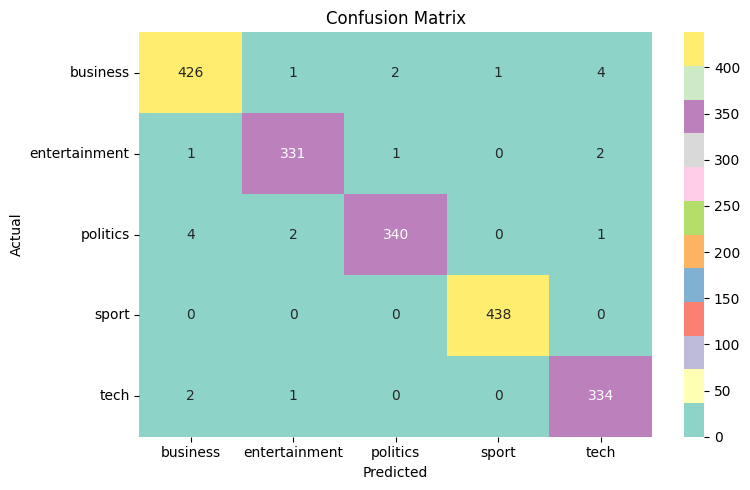

In [64]:
plot_confusion_matrix(
    y_true=train_data_labels, y_pred=y_train_pred, labels=labels_le.classes_
)

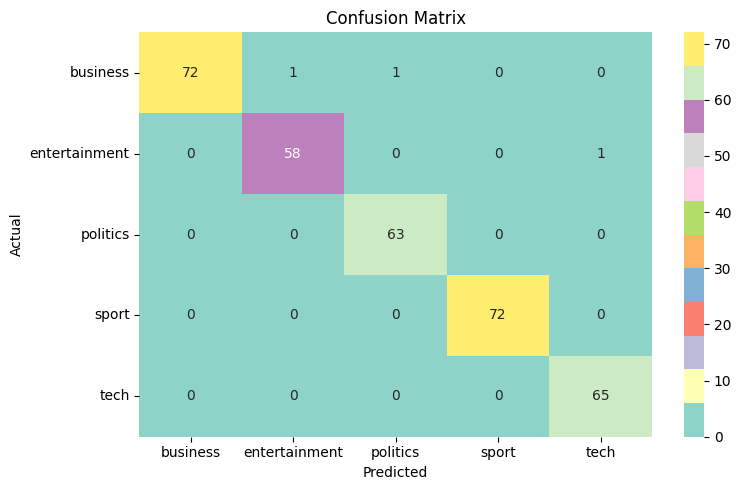

In [65]:
plot_confusion_matrix(
    y_true=test_data_labels, y_pred=y_test_pred, labels=labels_le.classes_
)

### Pipeline Implementation

In [66]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Sample Data
documents = [
    "This product is terrible and not worth the money.",
    "This is an amazing tutorial",
    "I am thrilled with the results and would recommend this to anyone.",
    "I do not enjoy watching movies that are too long",
    "Scikit-learn and gensim are great for NLP tasks",
    "The customer support was unhelpful and rude.",
    "The quality of this item is simply astonishing—in a bad way.",  # difficult
    "I enjoy studying artificial intelligence",
    "The customer support was fantastic—if by fantastic you mean non-existent.",  # difficult
    "Classification tasks are fun to solve",
]
labels = [0, 1, 1, 0, 1, 0, 0, 1, 0, 1]  # Binary labels for demonstration

# Preparing TaggedDocuments for training doc2vec
tagged_documents = [
    TaggedDocument(words=doc.lower().split(), tags=[str(i)])
    for i, doc in enumerate(documents)
]

# Train a doc2vec model
doc2vec_model = Doc2Vec(vector_size=20, window=2, min_count=1, workers=4, epochs=100)
doc2vec_model.build_vocab(tagged_documents)
doc2vec_model.train(
    tagged_documents,
    total_examples=doc2vec_model.corpus_count,
    epochs=doc2vec_model.epochs,
)


# Custom Transformer to convert documents to doc2vec vectors
class Doc2VecTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.model.infer_vector(doc.split()) for doc in X])


# Create a scikit-learn pipeline
pipeline = Pipeline(
    [
        ("doc2vec", Doc2VecTransformer(model=doc2vec_model)),
        ("classifier", LogisticRegression()),
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    documents, labels, test_size=0.2, random_state=42
)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [67]:
text: str = "I taught it was great but the students hated it."
# text: str = "This product is terrible and not worth the money."
pipeline.predict_proba([text])[:, 1], pipeline.predict([text])

(array([0.5055]), array([1]))